In [166]:
import optopy as op
import numpy as np
import matplotlib.pyplot as plt

## Case 1: 1mm beam waist, at waist, add HG10 mode in phase

shift is 0.03987599689992251 mm
expected 0.04 mm


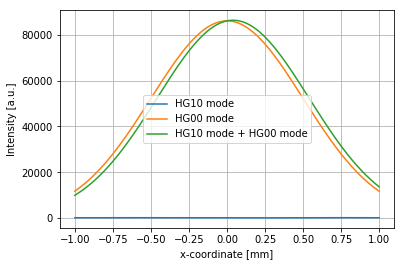

In [219]:
# Define beam parameters

lam=1064e-9
w0=1e-3
zR=np.pi*w0**2/lam
qs=[1j*zR,1j*zR]
n=1
m=0
offset=[0,0,0]

# define "grid" – basically just an x axis
x=np.linspace(-0.001,0.001,40000)
y=np.linspace(-0.001,0.001,3)

# proportion of HG10 mode to add
HG10scale=0.04

# calculate HG10 and HG00 fields over "grid" 
HG10field=op.HGfield(lam,qs,1,0,x,y,offset)*HG10scale
HG00field=op.HGfield(lam,qs,0,0,x,y,offset)
HGcombined=HG10field+HG00field

# take slices, calculate intensities
HG10intslice=abs(HG10field[1,:])**2
HG00intslice=abs(HG00field[1,:])**2
HGcombinedintslice=abs(HGcombined[1,:])**2

# plot intensity slices
plt.plot(x*1e3,HG10intslice,label='HG10 mode')
plt.plot(x*1e3,HG00intslice,label='HG00 mode')
plt.plot(x*1e3,HGcombinedintslice,label='HG10 mode + HG00 mode')
plt.xlabel('x-coordinate [mm]')
plt.ylabel('Intensity [a.u.]')
plt.legend()
plt.grid()

# calculate and print spot centers for initial beam and translated beam
# along with expectation

HG00maxel=np.where(HG00intslice == np.amax(HG00intslice))
HGcombinedmaxel=np.where(HGcombinedintslice == np.amax(HGcombinedintslice))

print "shift is "+str(1e3*(np.mean(x[HGcombinedmaxel[0]])-np.mean(x[HG00maxel[0]])))+" mm"
print "expected "+str(HG10scale)+" mm"

## Case 2: 1mm beam waist, at waist, add HG10 mode in quadrature phase

wavefront angle is 1.351847839037366e-05 rad
expected angle was 1.3547268756e-05 rad


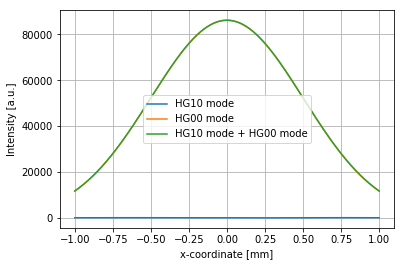

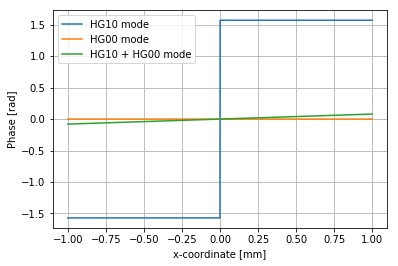

In [220]:
# Define beam parameters

lam=1064e-9
w0=1e-3
zR=np.pi*w0**2/lam
qs=[1j*zR,1j*zR]
n=1
m=0
offset=[0,0,0]

# define "grid" – basically just an x axis
x=np.linspace(-0.001,0.001,10000)
y=np.linspace(-0.001,0.001,3)

# proportion of HG10 mode to add
HG10scale_qphase=HG10scale*1j

# calculate HG10 and HG00 fields over "grid" 
HG10field=op.HGfield(lam,qs,1,0,x,y,offset)*HG10scale_qphase
HG00field=op.HGfield(lam,qs,0,0,x,y,offset)
HGcombined=HG10field+HG00field

# take slices, calculate intensities
HG10intslice=abs(HG10field[1,:])**2
HG00intslice=abs(HG00field[1,:])**2
HGcombinedintslice=abs(HGcombined[1,:])**2

# plot intensity slices
plt.plot(x*1e3,HG10intslice,label='HG10 mode')
plt.plot(x*1e3,HG00intslice,label='HG00 mode')
plt.plot(x*1e3,HGcombinedintslice,label='HG10 mode + HG00 mode')
plt.xlabel('x-coordinate [mm]')
plt.ylabel('Intensity [a.u.]')
plt.legend()
plt.grid()

# plot phase slices
plt.figure()
plt.plot(x*1e3,np.angle(HG10field[1,:]),label='HG10 mode')
plt.plot(x*1e3,np.angle(HG00field[1,:]),label='HG00 mode')
plt.plot(x*1e3,np.angle(HGcombined[1,:]),label='HG10 + HG00 mode')
plt.grid()
plt.xlabel('x-coordinate [mm]')
plt.ylabel('Phase [rad]')
plt.legend()

# Calculate effective wavefront angle on the combined beam
HGcombinedphase=np.angle(HGcombined[1,:])
phase_diff=HGcombinedphase[-1]-HGcombinedphase[0]
phase_angle=phase_diff/(x[-1]-x[0])
actual_angle=phase_angle/2/np.pi*lam

print "wavefront angle is "+str(actual_angle)+" rad"
theta=lam/np.pi/w0
expected_angle=abs(HG10scale)*theta
print "expected angle was "+str(expected_angle)+" rad"

## Case 3: 1mm beam waist, 1m away from waist, add HG10 mode in quadrature phase

shift is -0.013501350135013395 mm
expected -0.013547268756 mm


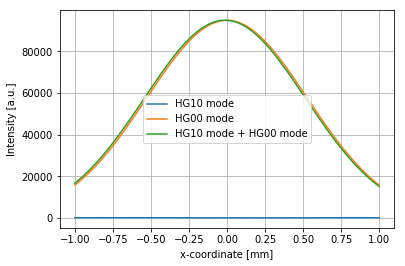

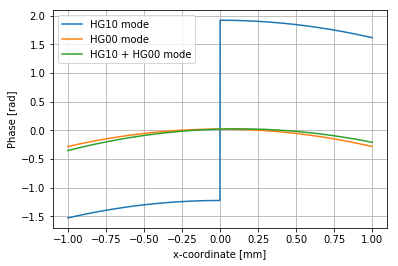

In [223]:
# Define beam parameters

lam=1064e-9
w0=1e-3
zR=np.pi*w0**2/lam
qs=[1+1j*zR,1+1j*zR]
n=1
m=0
offset=[0,0,0]

# define "grid" – basically just an x axis
x=np.linspace(-0.001,0.001,10000)
y=np.linspace(-0.001,0.001,3)

# proportion of HG10 mode to add
HG10scale_qphase=HG10scale*1j

# calculate HG10 and HG00 fields over "grid" 
HG10field=op.HGfield(lam,qs,1,0,x,y,offset)*HG10scale_qphase
HG00field=op.HGfield(lam,qs,0,0,x,y,offset)
HGcombined=HG10field+HG00field

# take slices, calculate intensities
HG10intslice=abs(HG10field[1,:])**2
HG00intslice=abs(HG00field[1,:])**2
HGcombinedintslice=abs(HGcombined[1,:])**2

# plot intensity slices
plt.plot(x*1e3,HG10intslice,label='HG10 mode')
plt.plot(x*1e3,HG00intslice,label='HG00 mode')
plt.plot(x*1e3,HGcombinedintslice,label='HG10 mode + HG00 mode')
plt.xlabel('x-coordinate [mm]')
plt.ylabel('Intensity [a.u.]')
plt.legend()
plt.grid()

# plot phase slices
plt.figure()
plt.plot(x*1e3,np.angle(HG10field[1,:]),label='HG10 mode')
plt.plot(x*1e3,np.angle(HG00field[1,:]),label='HG00 mode')
plt.plot(x*1e3,np.angle(HGcombined[1,:]),label='HG10 + HG00 mode')
plt.grid()
plt.xlabel('x-coordinate [mm]')
plt.ylabel('Phase [rad]')
plt.legend()


# calculate and print spot centers for initial beam and translated beam
# along with expectation

HG00maxel=np.where(HG00intslice == np.amax(HG00intslice))
HGcombinedmaxel=np.where(HGcombinedintslice == np.amax(HGcombinedintslice))

print "shift is "+str(1e3*(np.mean(x[HGcombinedmaxel[0]])-np.mean(x[HG00maxel[0]])))+" mm"
print "expected "+str(-expected_angle*1e3)+" mm"

## Case 4: 1mm Beam waist, 1m away from waist, add HG10 mode in phase

shift is 0.03990399039903989 mm
expected 0.04 mm


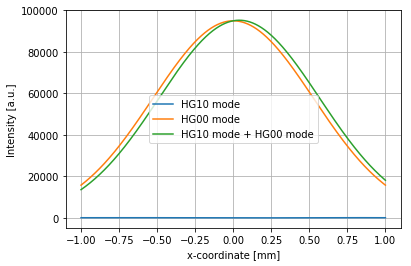

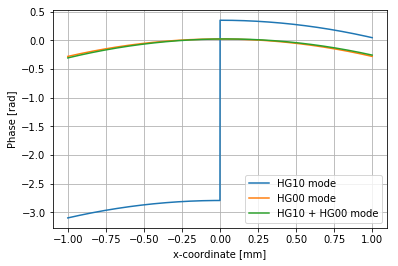

In [226]:
# Define beam parameters

lam=1064e-9
w0=1e-3
zR=np.pi*w0**2/lam
z=1
qs=[z+1j*zR,z+1j*zR]
n=1
m=0
offset=[0,0,0]

# define "grid" – basically just an x axis
x=np.linspace(-0.001,0.001,10000)
y=np.linspace(-0.001,0.001,3)

# proportion of HG10 mode to add
HG10scale_qphase=HG10scale

# calculate HG10 and HG00 fields over "grid" 
HG10field=op.HGfield(lam,qs,1,0,x,y,offset)*HG10scale_qphase
HG00field=op.HGfield(lam,qs,0,0,x,y,offset)
HGcombined=HG10field+HG00field

# take slices, calculate intensities
HG10intslice=abs(HG10field[1,:])**2
HG00intslice=abs(HG00field[1,:])**2
HGcombinedintslice=abs(HGcombined[1,:])**2

# plot intensity slices
plt.plot(x*1e3,HG10intslice,label='HG10 mode')
plt.plot(x*1e3,HG00intslice,label='HG00 mode')
plt.plot(x*1e3,HGcombinedintslice,label='HG10 mode + HG00 mode')
plt.xlabel('x-coordinate [mm]')
plt.ylabel('Intensity [a.u.]')
plt.legend()
plt.grid()

# plot phase slices
plt.figure()
plt.plot(x*1e3,np.angle(HG10field[1,:]),label='HG10 mode')
plt.plot(x*1e3,np.angle(HG00field[1,:]),label='HG00 mode')
plt.plot(x*1e3,np.angle(HGcombined[1,:]),label='HG10 + HG00 mode')
plt.grid()
plt.xlabel('x-coordinate [mm]')
plt.ylabel('Phase [rad]')
plt.legend()

# calculate and print spot centers for initial beam and translated beam
# along with expectation

HG00maxel=np.where(HG00intslice == np.amax(HG00intslice))
HGcombinedmaxel=np.where(HGcombinedintslice == np.amax(HGcombinedintslice))

print "shift is "+str(1e3*(np.mean(x[HGcombinedmaxel[0]])-np.mean(x[HG00maxel[0]])))+" mm"
#w=w0*np.sqrt(1+(z/zR)**2)
print "expected "+str(HG10scale)+" mm"